In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Cargar el conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/Proyecto de Título/Dataset/Datasets pre seleccionados/Heart Disease Dataset/heart.csv')

print(df.head())


Mounted at /content/drive
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Mostramos las variables que posee la base de datos
columns_names = df.columns.values
print(columns_names)


['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [ ]:
print('Existen {} pacientes con {} variables.'.
format(*df.shape))
print("Existen", df.size, "elementos")

Existen 1025 pacientes con 14 variables.
Existen 14350 elementos


In [ ]:
# Comprobación de missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

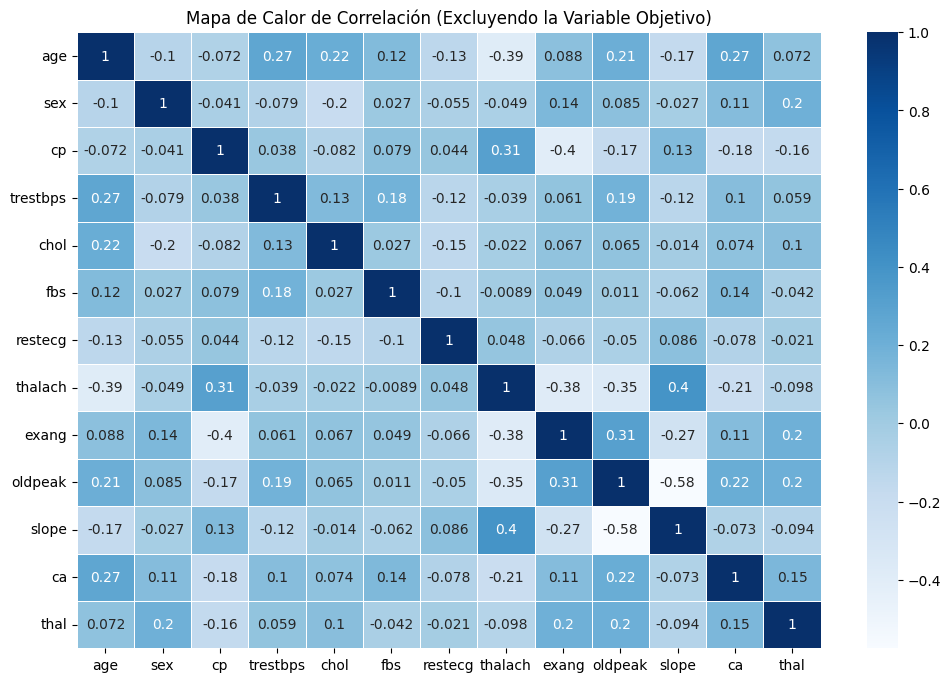

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame sin la columna "target"
df_no_target = df.drop(columns=['target'])

# Calcular la matriz de correlación
correlation_matrix = df_no_target.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Mapa de Calor de Correlación (Excluyendo la Variable Objetivo)')
plt.show()

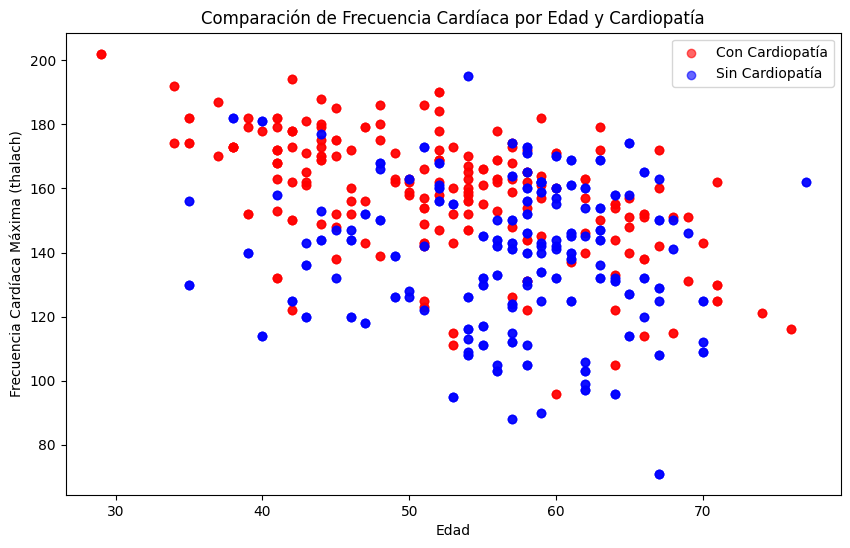

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para obtener dos conjuntos: uno para personas con cardiopatías
#y otro para personas sin cardiopatías
with_cardio = df[df['target'] == 1]
without_cardio = df[df['target'] == 0]

# Crear un gráfico de dispersión para comparar la frecuencia cardíaca
plt.figure(figsize=(10, 6))
plt.scatter(with_cardio['age'], with_cardio['thalach'], c='red', label='Con Cardiopatía', alpha=0.6)
plt.scatter(without_cardio['age'], without_cardio['thalach'], c='blue', label='Sin Cardiopatía', alpha=0.6)

# Personalizar el gráfico
plt.title('Comparación de Frecuencia Cardíaca por Edad y Cardiopatía')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Cardíaca Máxima (thalach)')
plt.legend()

# Mostrar el gráfico
plt.show()

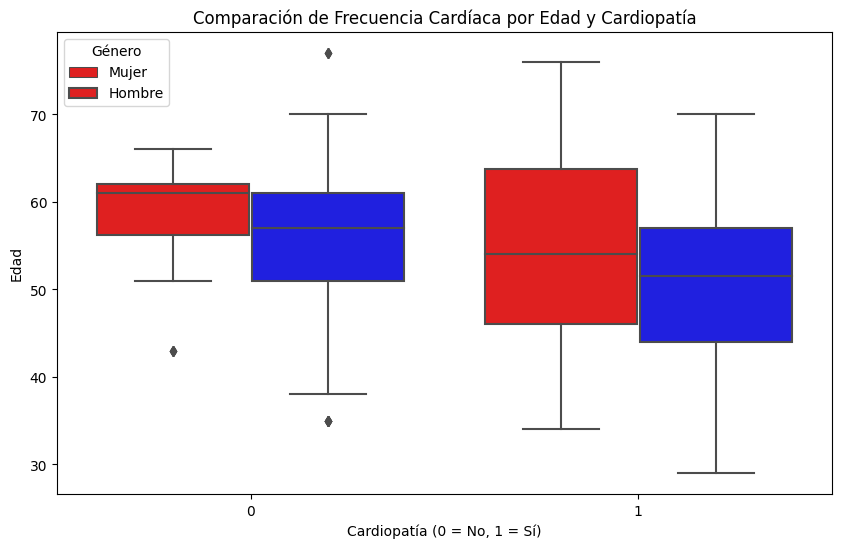

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define la paleta de colores para género
palette_colors = {0: 'red', 1: 'blue'}  # 0 representa mujeres y 1 representa hombres

# Crear un gráfico de caja para comparar la frecuencia cardíaca por edad y cardiopatía
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df, hue='sex', palette=palette_colors)

# Personalizar el gráfico
plt.title('Comparación de Frecuencia Cardíaca por Edad y Cardiopatía')
plt.xlabel('Cardiopatía (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.legend(title='Género', labels=['Mujer', 'Hombre'], loc='upper left')

# Mostrar el gráfico
plt.show()


In [ ]:
# Cálculo de estadísticas descriptivas básicas para las variables numéricas
descriptive_stats = df.describe()
print(descriptive_stats)

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

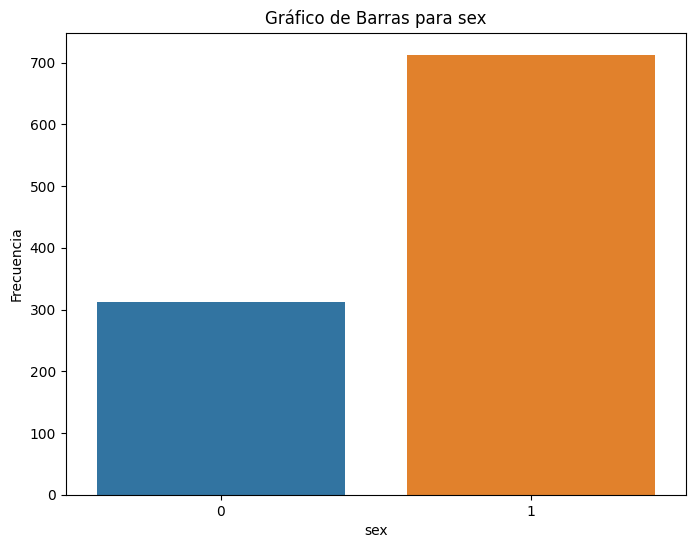

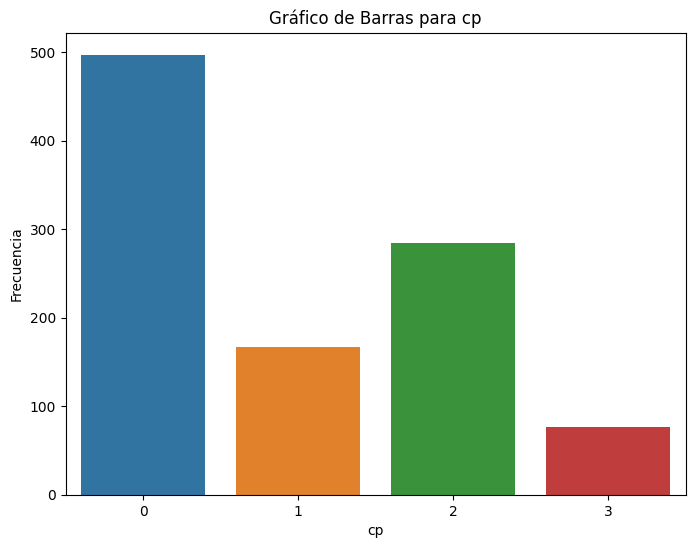

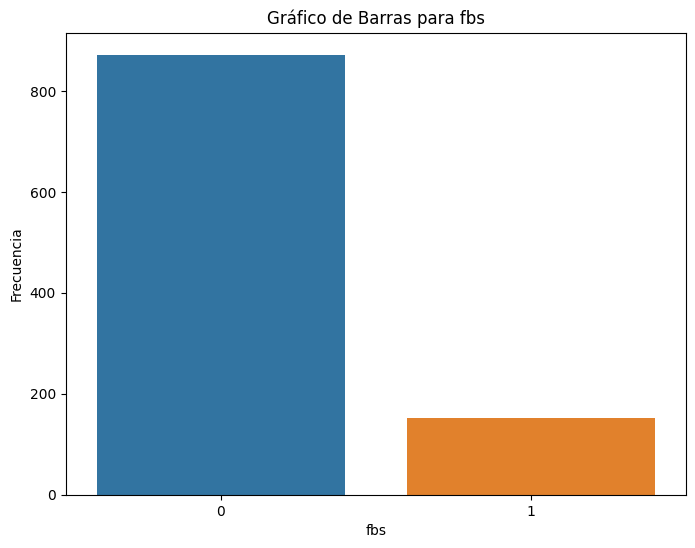

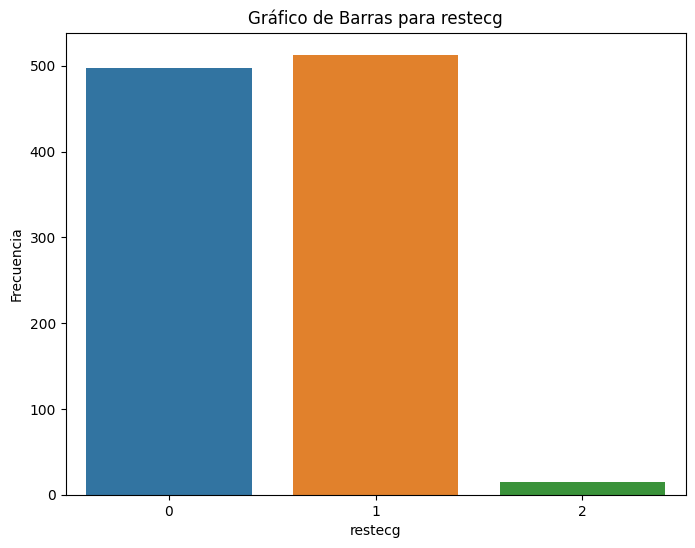

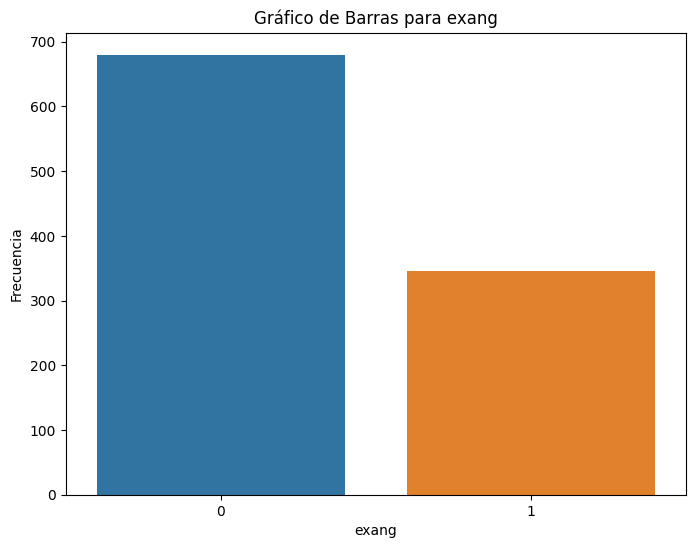

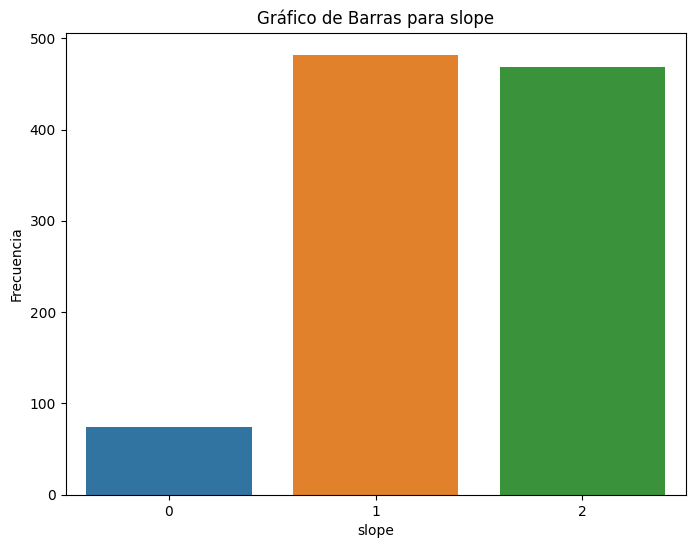

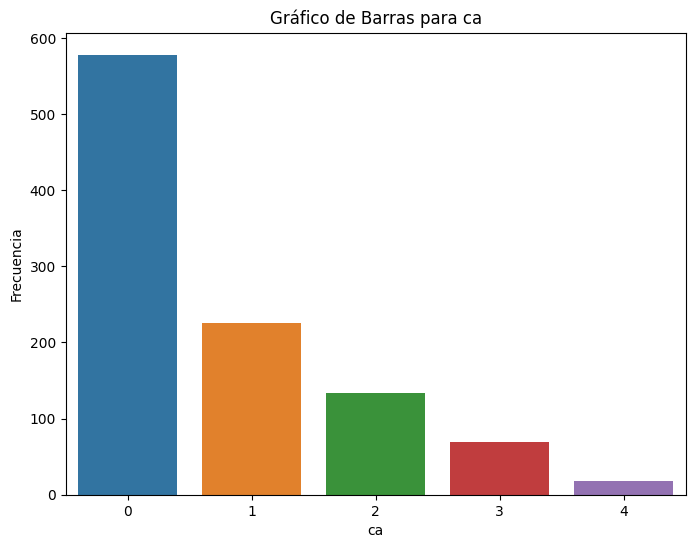

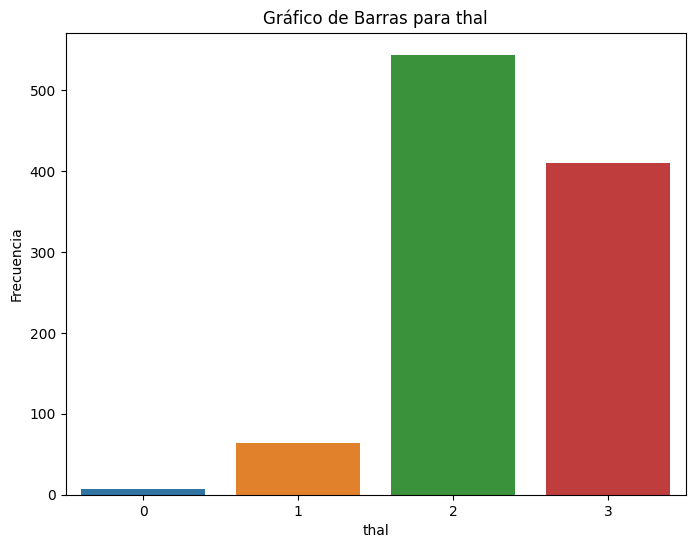

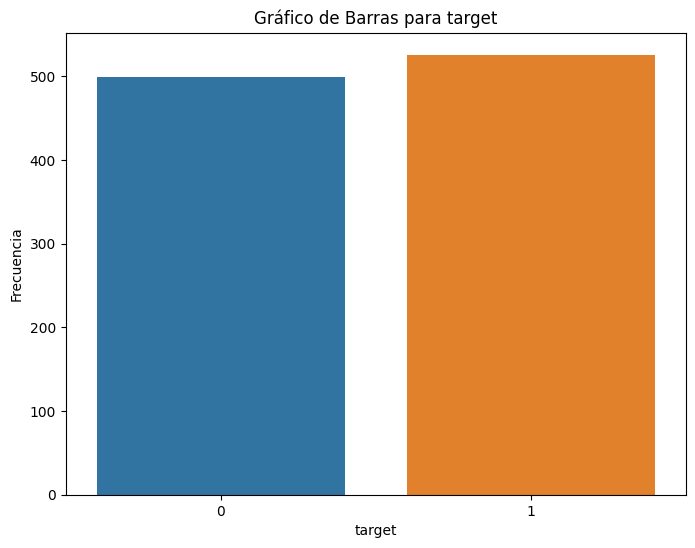

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Gráficos de barras para las variables categóricas
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Gráfico de Barras para {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

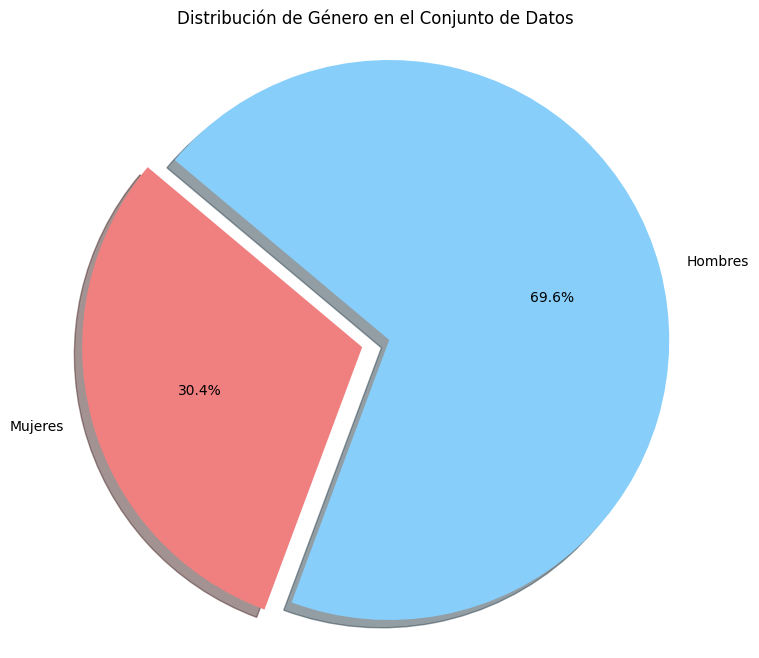

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de mujeres y hombres en el conjunto de datos
gender_counts = df['sex'].value_counts()

# Etiquetas para el gráfico
labels = ['Mujeres', 'Hombres']

# Valores correspondientes a las cantidades
sizes = [gender_counts[0], gender_counts[1]]

# Colores para las secciones del gráfico
colors = ['lightcoral', 'lightskyblue']

# Destacar la sección "Hombres"
explode = (0, 0.1)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Proporciona un círculo perfecto

# Título del gráfico
plt.title('Distribución de Género en el Conjunto de Datos')

# Mostrar el gráfico
plt.show()

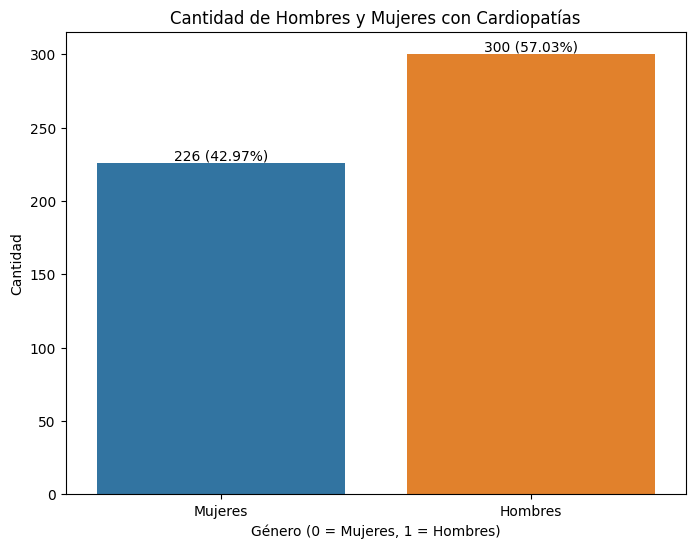

In [ ]:
# Análisis de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame que contenga solo las filas con cardiopatías
df_with_heart_disease = df[df['target'] == 1]

# Contar la cantidad de hombres y mujeres con cardiopatías
gender_counts = df_with_heart_disease['sex'].value_counts()

# Calcular los porcentajes
total = len(df_with_heart_disease)
percentage_female = (gender_counts[0] / total) * 100
percentage_male = (gender_counts[1] / total) * 100

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Personalizar el gráfico
plt.title('Cantidad de Hombres y Mujeres con Cardiopatías')
plt.xlabel('Género (0 = Mujeres, 1 = Hombres)')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Mujeres', 'Hombres'])

# Agregar porcentajes a las etiquetas de las barras
for i in range(len(gender_counts)):
    plt.text(i, gender_counts[i] + 2, f'{gender_counts[i]} ({round((gender_counts[i] / total) * 100, 2)}%)',
             horizontalalignment='center')

# Mostrar el gráfico
plt.show()

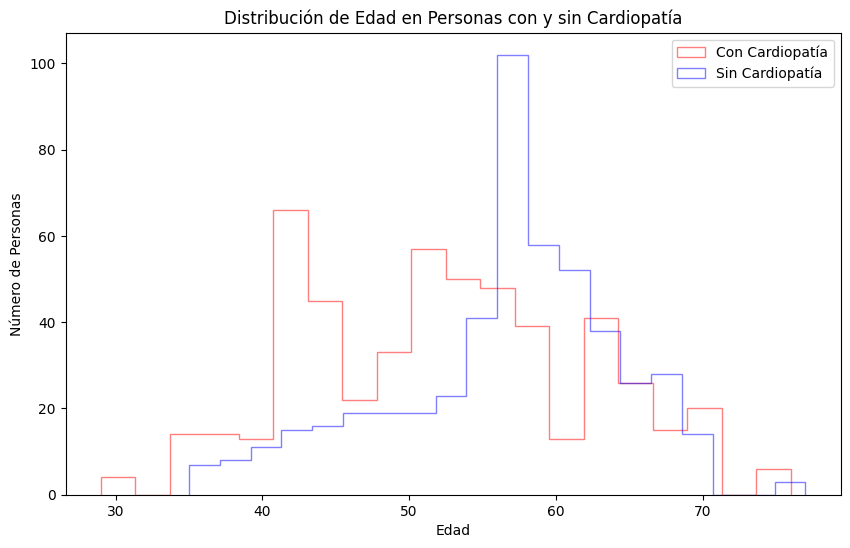

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener dos conjuntos de datos separados:
# uno para personas con cardiopatías (target=1) y otro para personas sin cardiopatías (target=0)
with_cardio = df[df['target'] == 1]
without_cardio = df[df['target'] == 0]

# Crear histogramas para ambas categorías
plt.figure(figsize=(10, 6))
plt.hist(with_cardio['age'], bins=20, alpha=0.5, label='Con Cardiopatía', color='red', histtype='step')
plt.hist(without_cardio['age'], bins=20, alpha=0.5, label='Sin Cardiopatía', color='blue', histtype='step')

# Etiquetas y título del gráfico
plt.xlabel('Edad')
plt.ylabel('Número de Personas')
plt.title('Distribución de Edad en Personas con y sin Cardiopatía')
plt.legend()

# Mostrar el histograma
plt.show()


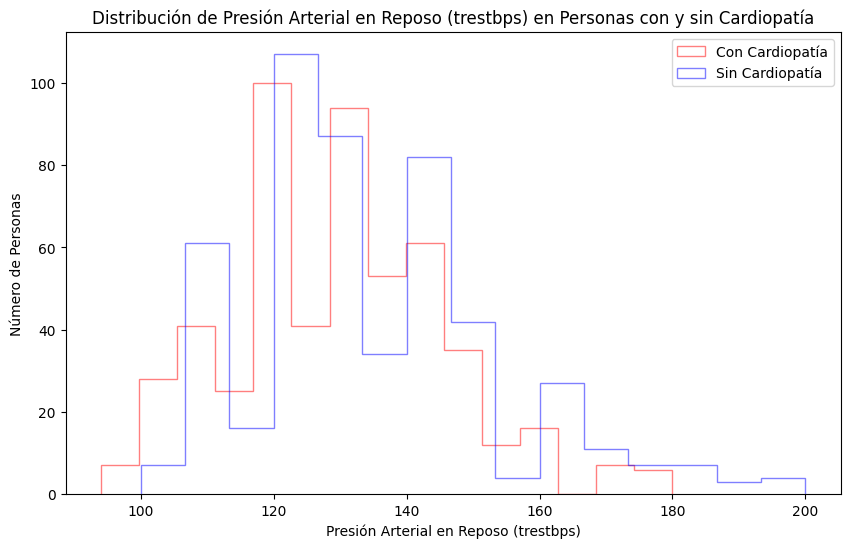

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener dos conjuntos de datos separados:
# uno para personas con cardiopatías (target=1) y otro para personas sin cardiopatías (target=0)
with_cardio = df[df['target'] == 1]
without_cardio = df[df['target'] == 0]

# Crear histogramas para ambas categorías
plt.figure(figsize=(10, 6))
plt.hist(with_cardio['trestbps'], bins=15, alpha=0.5, label='Con Cardiopatía', color='red', histtype='step')
plt.hist(without_cardio['trestbps'], bins=15, alpha=0.5, label='Sin Cardiopatía', color='blue', histtype='step')

# Etiquetas y título del gráfico
plt.xlabel('Presión Arterial en Reposo (trestbps)')
plt.ylabel('Número de Personas')
plt.title('Distribución de Presión Arterial en Reposo (trestbps) en Personas con y sin Cardiopatía')
plt.legend()

# Mostrar el histograma
plt.show()


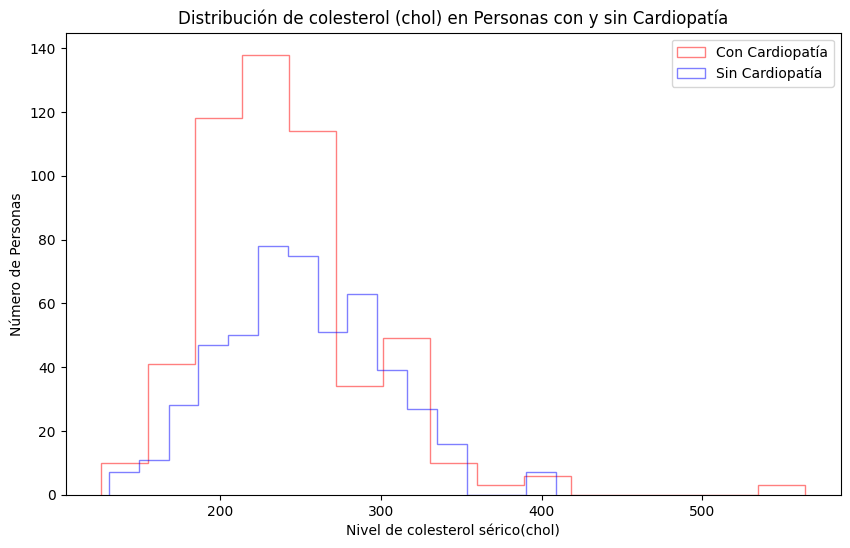

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener dos conjuntos de datos separados:
# uno para personas con cardiopatías (target=1) y otro para personas sin cardiopatías (target=0)
with_cardio = df[df['target'] == 1]
without_cardio = df[df['target'] == 0]

# Crear histogramas para ambas categorías
plt.figure(figsize=(10, 6))
plt.hist(with_cardio['chol'], bins=15, alpha=0.5, label='Con Cardiopatía', color='red', histtype='step')
plt.hist(without_cardio['chol'], bins=15, alpha=0.5, label='Sin Cardiopatía', color='blue', histtype='step')

# Etiquetas y título del gráfico
plt.xlabel('Nivel de colesterol sérico(chol)')
plt.ylabel('Número de Personas')
plt.title('Distribución de colesterol (chol) en Personas con y sin Cardiopatía')
plt.legend()

# Mostrar el histograma
plt.show()


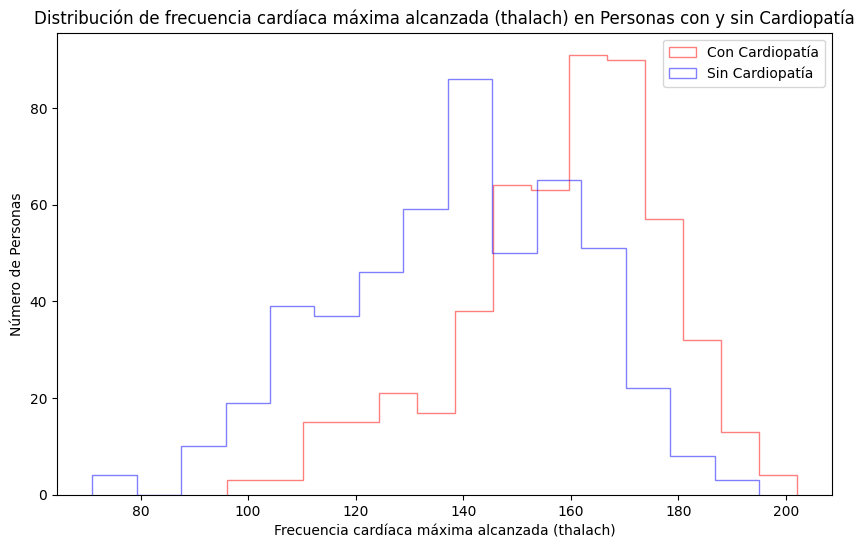

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener dos conjuntos de datos separados:
# uno para personas con cardiopatías (target=1) y otro para personas sin cardiopatías (target=0)
with_cardio = df[df['target'] == 1]
without_cardio = df[df['target'] == 0]

# Crear histogramas para ambas categorías
plt.figure(figsize=(10, 6))
plt.hist(with_cardio['thalach'], bins=15, alpha=0.5, label='Con Cardiopatía', color='red', histtype='step')
plt.hist(without_cardio['thalach'], bins=15, alpha=0.5, label='Sin Cardiopatía', color='blue', histtype='step')

# Etiquetas y título del gráfico
plt.xlabel('Frecuencia cardíaca máxima alcanzada (thalach)')
plt.ylabel('Número de Personas')
plt.title('Distribución de frecuencia cardíaca máxima alcanzada (thalach) en Personas con y sin Cardiopatía')
plt.legend()

# Mostrar el histograma
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()
# Definir las características que deseas normalizar
features_to_normalize = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# Aplicar la normalización solo a las características seleccionadas
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
print(df.head())

        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  cluster  
0  0.161290    1.0  0.50  1.000000       0        2  
1  0.500000    0.0  0.00  1.000000       0        2  
2  0.419355    0.0  0.00  1.000000       0        0  
3  0.000000    1.0  0.25  1.000000       0        0  
4  0.306452    0.5  0.75  0.666667       0        0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

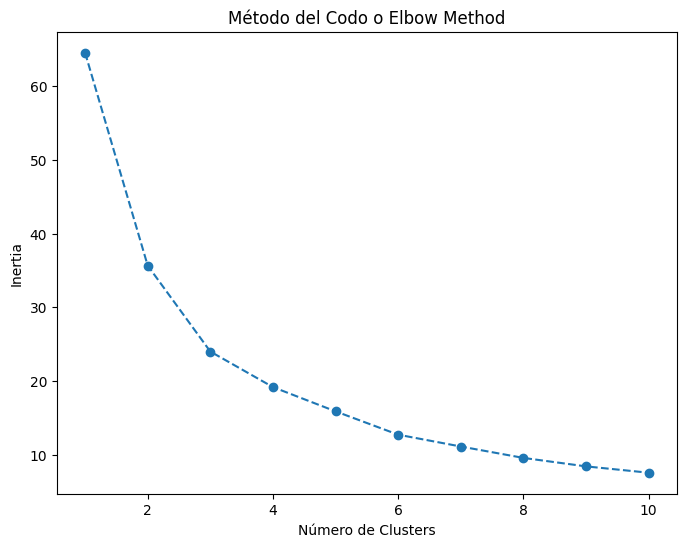

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["age", "trestbps"]].values

# Encontrar el número óptimo de clusters (método del codo)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo para encontrar el número óptimo de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo o Elbow Method')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


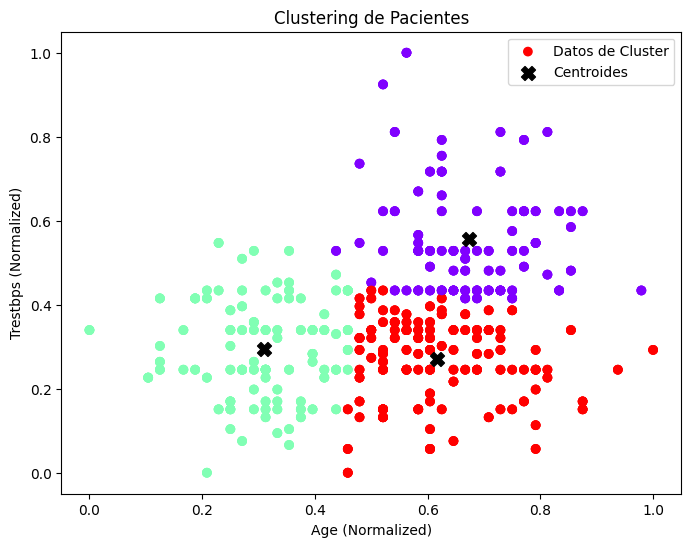

In [ ]:
# Basado en el gráfico anterior, k=3

# Aplicar el algoritmo de K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Obtiene los centroides de los clusters
centroids = kmeans.cluster_centers_

# Gráfica los datos de los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], cmap='rainbow')
plt.xlabel('Age (Normalized)')
plt.ylabel('Trestbps (Normalized)')
plt.title('Clustering de Pacientes')

# Gráfica los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100)
plt.legend(['Datos de Cluster', 'Centroides'])
plt.show()